In [91]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
# set_matplotlib_formats('svg')
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 100

# Example 1


Parameters found after 268 iterations with a tolerance of 0.0001:
w=-0.7894878652069195 b=68.9275139045338


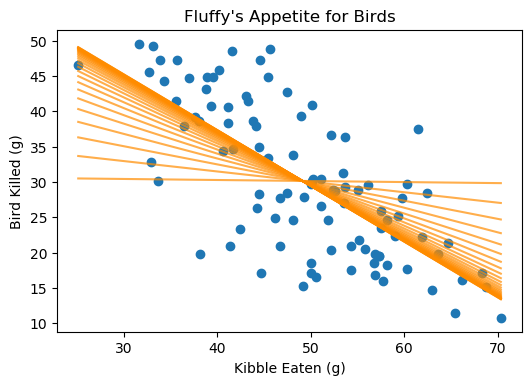

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def linreg(x, y, alpha=1e-4, max_iters=300, tol=1e-4, title=None,xlabel=None,ylabel=None):
    """
    Computes a univariate linear regression with gradient descent
    and plots a pretty graph.
    
    Arguments:
    
      x - the example inputs
      y - the output for the given inputs
      alpha - the learning rate
      max_iters - the maximum number of iterations
      tol - stop gradient descent if changes less than this amount
    
    There are two additional improvements
    w = np.zeros(p) where p is the dimensionality
    dw = (-2/n) * np.matmul(x, errors)
    """
    
    w, b, iters = 0, 0, 0
    n = len(x)
    
    # Mean center the data
    xbar, ybar = np.mean(x), np.mean(y)
    xc, yc = x - xbar, y - ybar
    
    plt.scatter(x,y)
    while iters < max_iters:        
        errors = yc - w*xc - b
        
        dw = (-2/n) * sum(xc*errors)
        db = (-2/n) * sum(errors)

        # Update the weights and biases
        w1 = w - alpha * dw
        b1 = b - alpha * db

        is_done = tol > np.linalg.norm([w1 - w, b1 - b])
        
        w, b = w1, b1
        
        if is_done or iters % 10 == 0:
            # Plot everything correcting for the mean centering.
            xs = np.linspace(min(x), max(x))
            ys = w*xs + b
            ys += - w*xbar + ybar # Adjust for centering
            plt.plot(xs, ys, color='darkorange', alpha=0.7)
        
        if is_done: break
        iters += 1


    if iters == max_iters:
        print("Warning: Maximum iterations reached without achieving tolerance.")

    print(f"Parameters found after {iters} iterations with a tolerance of {tol}:")
    print(f"w={w} b={b - w*xbar + ybar}")
    
    plt.title(title if title else f"Linear Regression with Gradient Descent after {iters} Iterations")
    plt.xlabel(xlabel)        
    plt.ylabel(ylabel)
    plt.show()
    
data = pd.read_csv('data/appetite.csv')
linreg(data['kibble'], data['bird'],
       title="Fluffy's Appetite for Birds",
       xlabel="Kibble Eaten (g)", ylabel="Bird Killed (g)")

In [55]:
import numpy as np
import matplotlib.pyplot as plt

def linreg(x, y, alpha=1e-4, max_iters=500):
    """
    x - the example inputs
    y - the output for the given inputs
    alpha - the learning rate
    max_iters - the maximum number of iterations
    """
    
    n, w, b, iters = len(x), 0, 0, 0
    
    # Mean center the data
    xbar, ybar = np.mean(x), np.mean(y)
    xc, yc = x - xbar, y - ybar
    
    while iters < max_iters:        
        # Update the weights and biases
        errors = yc - w*xc - b
        w = w - alpha * (-2/n) * sum(xc*errors)
        b = b - alpha * (-2/n) * sum(errors)
        
    print(f"Parameters found after {iters} iterations:")
    print(f"w={w} b={b - w*xbar + ybar}")

TypeError: linreg() got an unexpected keyword argument 'title'

### Example 2

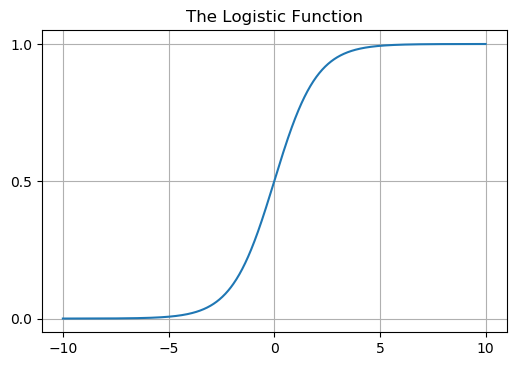

In [56]:
xs = np.linspace(-10, 10, 1000)
ys = 1/(1 + np.exp(-xs))
plt.plot(xs, ys)
plt.yticks([0, 0.5, 1])
plt.xticks(list(range(-10, 11, 5)))
plt.title("The Logistic Function")
plt.grid(True)
plt.show()

Example 3 

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import autograd.numpy as np
from autograd import grad

    
start = np.floor(np.random.normal(7, 10, 20) + np.random.normal(50, 20, 20))
end = np.floor(np.random.normal(5, 10, 80))

#x = np.array([max(x, 5) for x in list(start) + list(end)])
#y = np.array([1 if x < 20 else 0 for x in range(100)])

# plt.scatter(x, y, alpha=0.5)
# plt.title("Fluffy Entries")
# plt.xlabel("# Red Pixels")
# plt.ylabel("Dead bird?")
# plt.show()
plt.xticks(np.arange(0, 100, step=10))
plt.title("Fluffy Entries")
plt.xlabel("# Red Pixels")
plt.ylabel("Dead bird?")

    
def logreg(x, y, alpha=5*1e-4, max_iters=5000):
    # We combine w and b to make the gradient simpler
    xc = np.stack((x, np.ones(len(x))), axis=1)
    w, iters = np.array([0.0, 0.0]), 0
    
    def loss(w):
        p = 1.0 / (1.0 + np.exp(-np.dot(xc, w)))
        return -np.sum(np.log(p*y + (1.0 - p)*(1.0 - y)))

    gradient = grad(loss)

    plt.scatter(x, y, alpha=0.5)
    while iters < max_iters:
        w -= alpha * gradient(w)
        iters += 1
        if iters > 500 and iters % 500 == 0:
            xs = np.linspace(0, 100, 1000)
            xs = np.stack((xs, np.ones(1000)), axis=1)
            ys = 1/(1 + np.exp(-np.dot(xs, w)))
            plt.plot(xs, ys, color="darkorange")
        
    print(f"Parameters found after {iters} iterations:")
    print(f"w={w[0]} b={w[1]}")
    
logreg(x, y)
plt.show()

ModuleNotFoundError: No module named 'autograd'

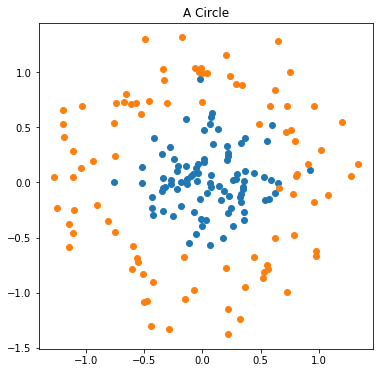

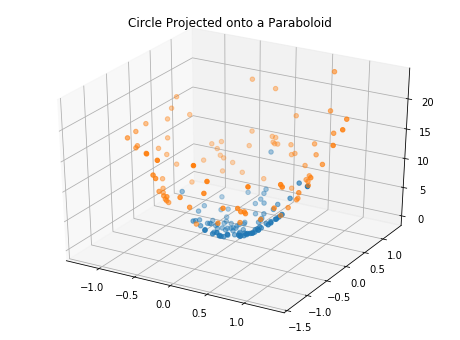

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as ds
from sklearn.model_selection import train_test_split
%matplotlib inline
ns = 300
data = {}
data['x'], data['y'] = ds.make_circles(n_samples=ns,
    noise=0.2, factor=0.3, random_state=1)


T, S = {}, {}
T['x'], S['x'], T['y'], S['y'] = train_test_split(data['x'], data['y'],  test_size=testFraction, random_state=0)
p, n = S['x'][S['y']==1], S['x'][S['y']!=1]
plt.figure(figsize=(6,6))
plt.plot(p[:, 0], p[:, 1], 'o')
plt.plot(n[:, 0], n[:, 1], 'o')
plt.title('A Circle')
plt.show()
# plt.axis('off')

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


def augment(x):
    return [x[0], x[1], x[0]**2, x[1]**2, x[0] * x[1]]





Tx_aug = np.apply_along_axis(augment, 1, T['x'])
Sx_aug = np.apply_along_axis(augment, 1, S['x'])


import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(111, projection='3d')
ax.set_title("Circle Projected onto a Paraboloid")
x = p[:, 0]
y = p[:, 1]
ax.scatter(x, y, zs=10*x**2 + 10*y**2 + x*y + x + y)
x = n[:, 0]
y = n[:, 1]
ax.scatter(x, y, zs=10*x**2 + 10*y**2 + x*y + x + y)

# model = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial', random_state=0)
# model.fit(Tx_aug, T['y'])

# training_error = accuracy_score(T['y'], model.predict(Tx_aug))

# test_error = accuracy_score(S['y'], model.predict(Sx_aug))

# print(f"Training error {training_error * 100:.2f}%")
# print(f"Test error {test_error * 100:.2f}%")

# show_data(model, T_aug, 'Logistic Regression', augmentor = augment)


In [75]:
len(x**2 + y**2 + x*y + x + y)

90

In [60]:
Tx_aug

array([[ 3.07545516e-01,  4.97306902e-02,  9.45842443e-02,
         2.47314154e-03,  1.52944508e-02],
       [-2.11159807e-01,  1.74281827e-01,  4.45884642e-02,
         3.03741552e-02, -3.68013170e-02],
       [ 7.56834022e-01, -2.41385851e-01,  5.72797737e-01,
         5.82671290e-02, -1.82689024e-01],
       [-1.04623897e+00,  1.34255471e-01,  1.09461598e+00,
         1.80245314e-02, -1.40463305e-01],
       [ 3.27256028e-01, -8.16420190e-01,  1.07096508e-01,
         6.66541926e-01, -2.67178428e-01],
       [ 8.05945727e-01, -9.18318761e-01,  6.49548515e-01,
         8.43309348e-01, -7.40115082e-01],
       [-2.58286063e-01, -1.83100694e-01,  6.67116902e-02,
         3.35258642e-02,  4.72923574e-02],
       [-2.07107568e-01, -4.98666207e-01,  4.28935446e-02,
         2.48667986e-01,  1.03277545e-01],
       [ 2.72364097e-02, -1.05302950e-01,  7.41822014e-04,
         1.10887112e-02, -2.86807428e-03],
       [-6.28086637e-01, -5.74176977e-01,  3.94492824e-01,
         3.29679201e-01

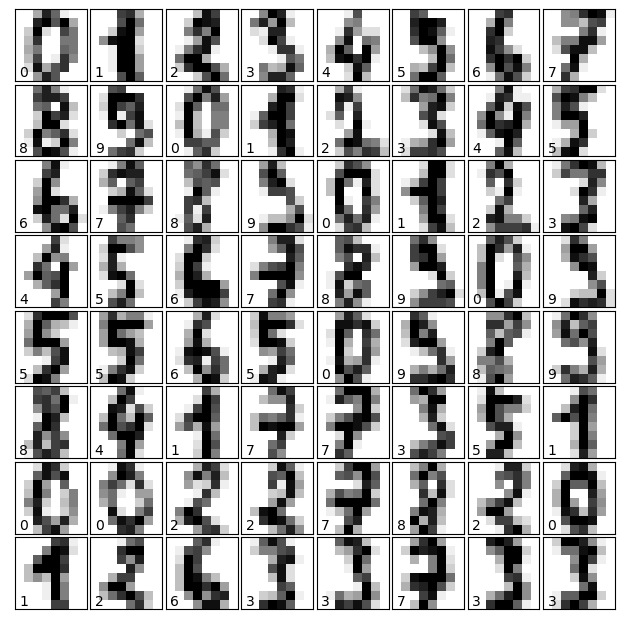

In [29]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

digits = sklearn.datasets.load_digits()
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

Text(0.5, 0, 'Horizontal Distance from Sensor (cm)')

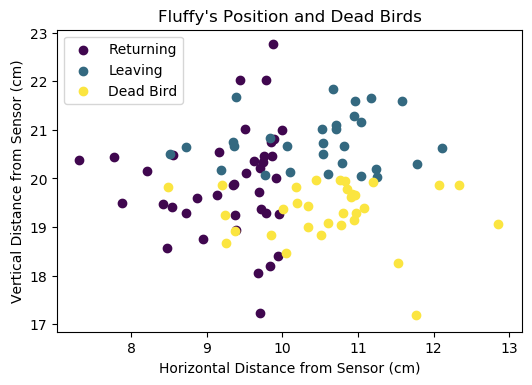

In [110]:
import math
import numpy as np
from matplotlib import pyplot as plt

def graph_bounds(xs):
    xmin = xs.min()
    xmin = xmin - abs(0.5*xmin)
    xmax = xs.max()
    xmax = xmax + abs(0.5*xmax)

    return (xmin, xmax)

def plot_decision_regions(clf, Xs, augmentor= lambda x: x):
    def graph_grid(xbounds, ybounds, step_size = 0.01):
        xs = np.arange(7, 13, step_size)
        ys = np.arange(17, 23, step_size)
        return np.meshgrid(xs, ys)

    xs = Xs[:, 0]
    ys = Xs[:, 1]
    xx, yy = graph_grid(graph_bounds(xs), graph_bounds(ys))
    preds = clf.predict(
        np.apply_along_axis(augmentor, 1, np.c_[xx.ravel(), yy.ravel()])
    )
    preds = preds.reshape(xx.shape)*2 - 1
    plt.contourf(xx, yy, preds, alpha=0.3)

def plot_points(clf, data_set, is_svm):
    xs = data_set['x']
    ys = data_set['y']
    preds = clf.predict(xs)

        
    for i in range(len(preds)):
        marker = 'o' if ys[i] == preds[i] else 'v'
        color = 'blue' if ys[i] > 0 else 'red'
        fillstyle = 'none'
        if is_svm and i in clf.support_:
            fillstyle = 'full'
        
        plt.plot(xs[i][0], xs[i][1], marker=marker, color=color, markersize=5, fillstyle=fillstyle)


def classes(x):
    if x[0] < 0 and np.random.uniform() < 0.7: return 0
    if x[1] >= 0: return 1
    return 2
    
xs = np.array(list(zip(np.random.normal(size=100), np.random.normal(size=100))))
ys = [classes(x) for x in xs]


data = { 'x': xs, 'y': ys }

with open('data/multiclass.pkl', 'rb') as f:
    data = pickle.load(f)
    
xs, ys = data['x'], np.array(data['y'])
xs = xs + [10, 20]

fig, ax = plt.subplots()
ax.scatter(xs[ys == 0][:, 0], xs[ys == 0][:, 1], label='Returning', c='#40074F')
ax.scatter(xs[ys == 1][:, 0], xs[ys == 1][:, 1], label='Leaving', c="#346980")
ax.scatter(xs[ys == 2][:, 0], xs[ys == 2][:, 1], label='Dead Bird', c="#FBE540")
ax.legend()
plt.title("Fluffy's Position and Dead Birds")
plt.ylabel("Vertical Distance from Sensor (cm)")
plt.xlabel("Horizontal Distance from Sensor (cm)")

/Users/faraz/.pyenv/versions/anaconda3-2019.07/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/faraz/.pyenv/versions/anaconda3-2019.07/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


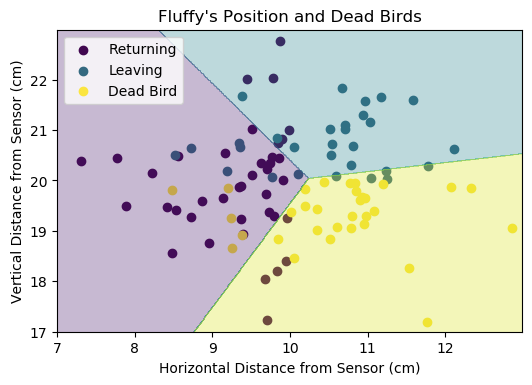

In [111]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1e5)
model.fit(xs, ys)
    

fig, ax = plt.subplots()
ax.scatter(xs[ys == 0][:, 0], xs[ys == 0][:, 1], label='Returning', c='#40074F')
ax.scatter(xs[ys == 1][:, 0], xs[ys == 1][:, 1], label='Leaving', c="#346980")
ax.scatter(xs[ys == 2][:, 0], xs[ys == 2][:, 1], label='Dead Bird', c="#FBE540")
ax.legend()
plt.title("Fluffy's Position and Dead Birds")
plt.ylabel("Vertical Distance from Sensor (cm)")
plt.xlabel("Horizontal Distance from Sensor (cm)")
plot_decision_regions(model, xs)

In [33]:
model.predict([[0, 0]])

NameError: name 'model' is not defined

In [32]:
plt.scatter(xs[:, 0], xs[:, 1], c=ys)
plt.show()
plt.title()

NameError: name 'xs' is not defined

In [89]:
model.predict_proba([[0, 0]])

array([[0.21108565, 0.43698304, 0.35193131]])

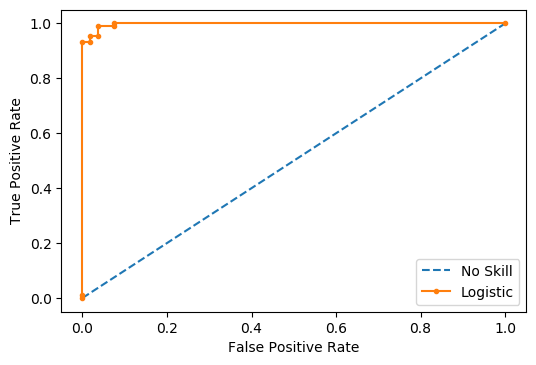

No Skill: ROC AUC=0.005
Logistic: ROC AUC=0.997


In [172]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score, roc_curve

X, y = sklearn.datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

model = LogisticRegressionCV(Cs = [0.1, 1, 10, 100], cv = 5, max_iter=3000, tol=0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Predict probabilities
probs = model.predict_proba(X_test)[:, 1]

# Calculate scores and curves
auc = roc_auc_score(y_test, probs)
fpr, tpr, _ = roc_curve(y_test, probs)


# Plot the roc curve for the model
plt.plot([0, 1], [0, 1], linestyle='--', label="No Skill")
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print('No Skill: ROC AUC=0.005')
print('Logistic: ROC AUC=%.3f' % (auc))

In [146]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import KFold

lambdas = [0.001, 0.1, 1, 10, 100]
kf = KFold(n_splits=5)

mses = []
for lambda_ in lambdas:
    mses_for_lambda = []
    for train_index, test_index in kf.split(X_train):
        X_tr, X_te = X_train[train_index], X_train[test_index]
        y_tr, y_te = y_train[train_index], y_train[test_index]
        
        model = Ridge(alpha = lambda_)
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_test)
        
        mses_for_lambda.append(mean_squared_error(y_test, y_pred))
    mses.append(np.mean(mses_for_lambda))

mse, i = min([(mse, i) for i, mse in enumerate(mses)])

print(f"Best lambda found {lambdas[i]} with MSE {mse}")

Best lambda found 0.001 with MSE 30.257115164419343
